## CS5691 PRML Assignment 1
**Team 1**  
**Team Members:**  
N Sowmya Manojna   BE17B007  
Thakkar Riya Anandbhai  PH17B010   
Chaithanya Krishna Moorthy  PH17B011   

In [1]:
# Install required Packages
# !pip install -r requirements.txt
# try:
#     !mkdir images

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('science')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 12,9

In [3]:
df = pd.read_csv("../datasets/function1.csv", index_col=0)
df.sort_values(by=["x"], inplace=True)
df.head()

,x,y
1731,-1.995370,20.924170
1328,-1.994300,20.697622
730,-1.989581,20.418372
13,-1.988462,20.505452
546,-1.988102,20.644535


In [4]:
def get_polynomial_features(X, degree):
    """
    Function to get the polynomial transformation
    of a given input.
    IP: 
        - 1 dimensional vector X
        - degree to be transformed to
    OP: 
        - (degree+1) dimensional polynomial transformation of X
    """
    
    X_new = np.ones(X.shape)
    for i in range(1, degree+1):
        X_new = np.append(X_new, X**i, axis=1)
        
    return X_new

def get_weights(X, y, lmbda=0):
    """
    Function to calculate the weights according to the 
    closed form solution for transformed linear regression.
    In the absence of lmbda parameter, the function performs
    regression without regularization.
    """
    
    d = X.shape[1]
    W = ((np.linalg.inv(X.T @ X + lmbda*np.identity(d))) @ X.T) @ y
    return W

def get_predictions(W, X):
    """
    Function to predict the output, given the transformed
    input, weights.
    """
    y = X @ W
    return y


def get_plot(X, y, y_pred, X_sampled, y_sampled, title="", fname="tmp"):
    plt.figure()
    plt.plot(X, y, label="True Value")
    if y_sampled.size >= 100:
        plt.plot(X_sampled, y_sampled, 'r.', alpha=0.5, label="Sampled points")
    else:
        plt.plot(X_sampled, y_sampled, 'ro', alpha=0.75, label="Sampled points")
    plt.plot(X, y_pred, label="Predicted Value")
    if title:
        plt.title(title)
    plt.xlabel("X-values")
    plt.ylabel("Y-values")
    plt.legend()
    plt.savefig("images/"+fname)
    plt.show()

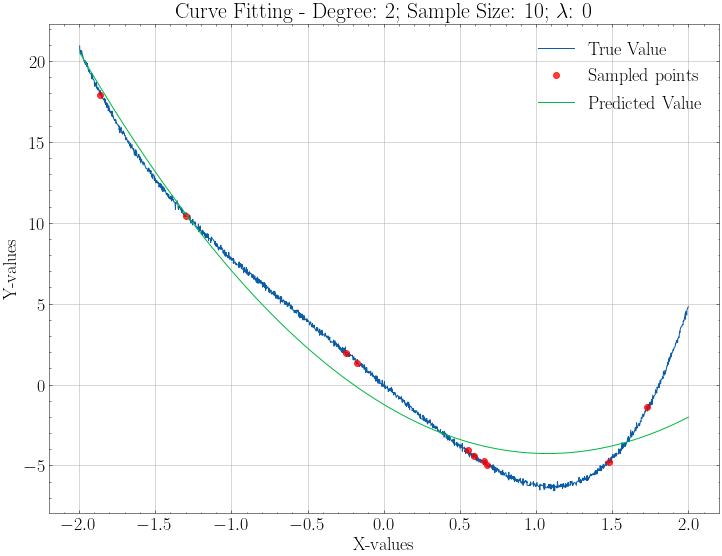

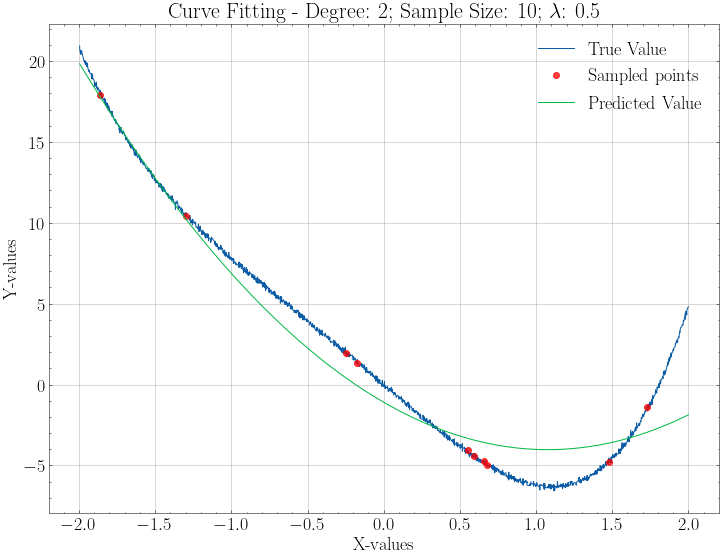

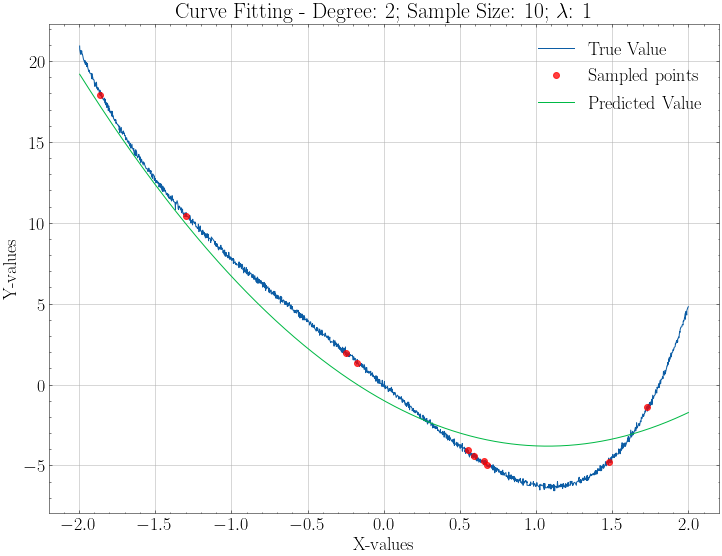

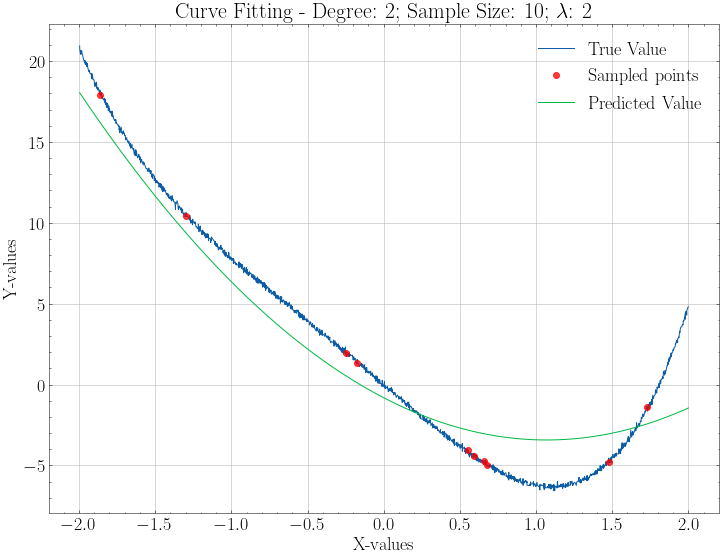

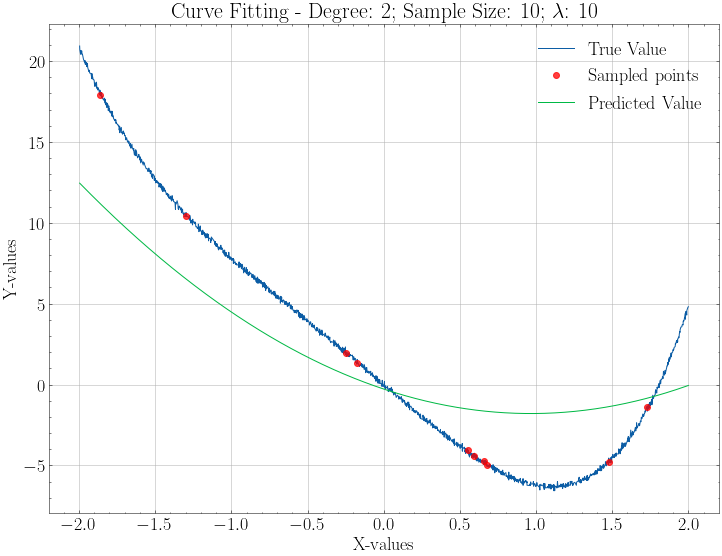

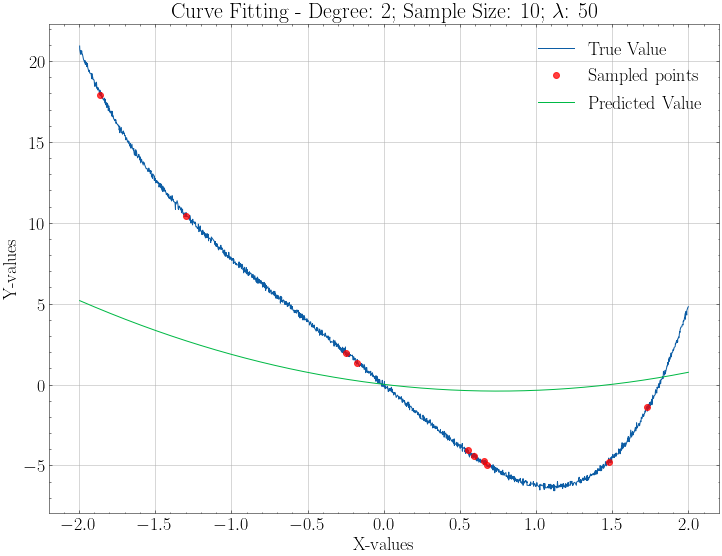

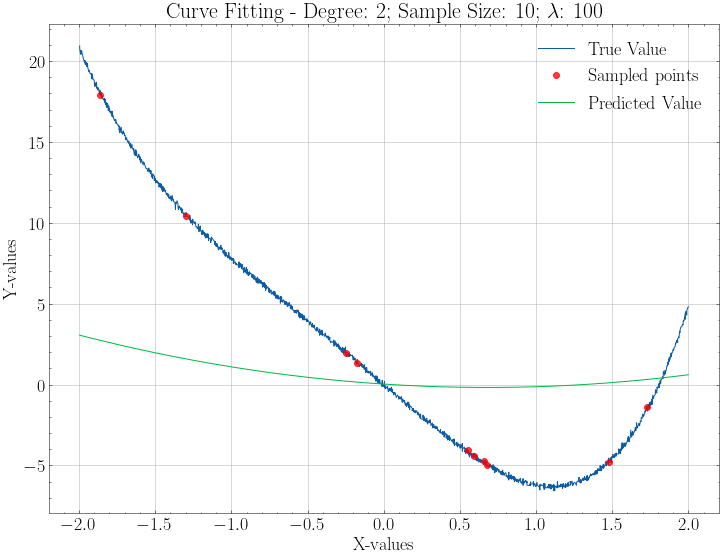

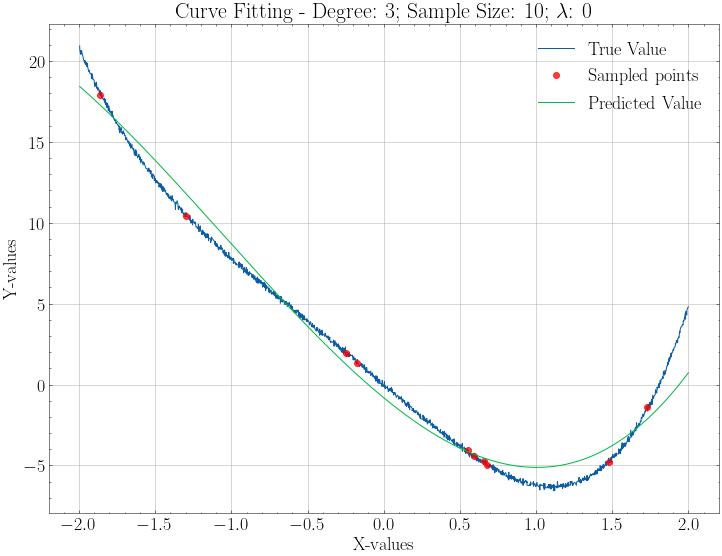

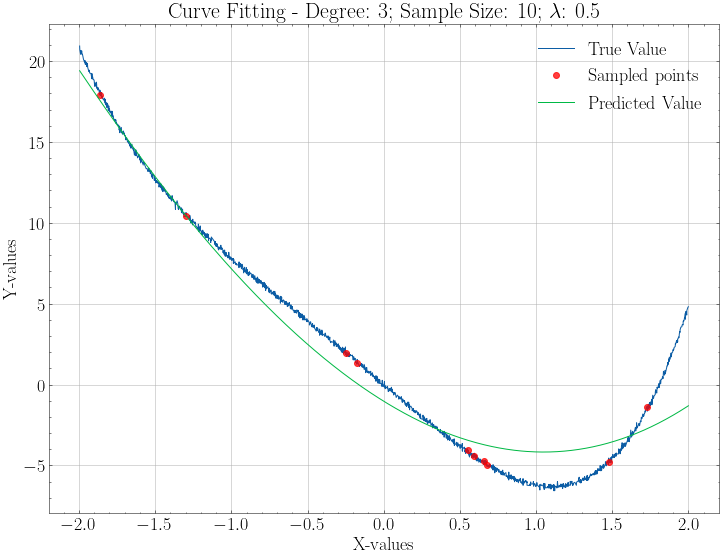

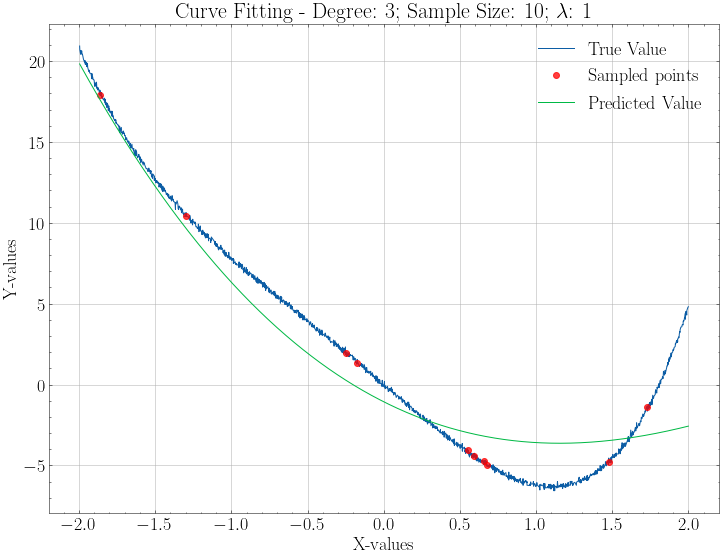

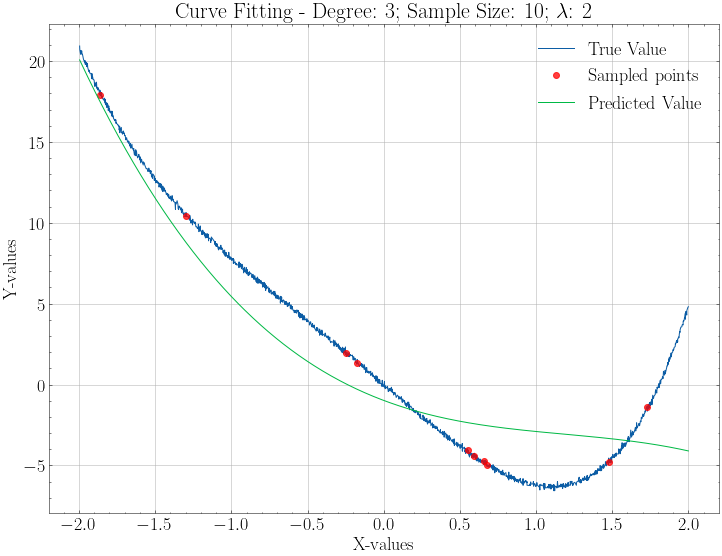

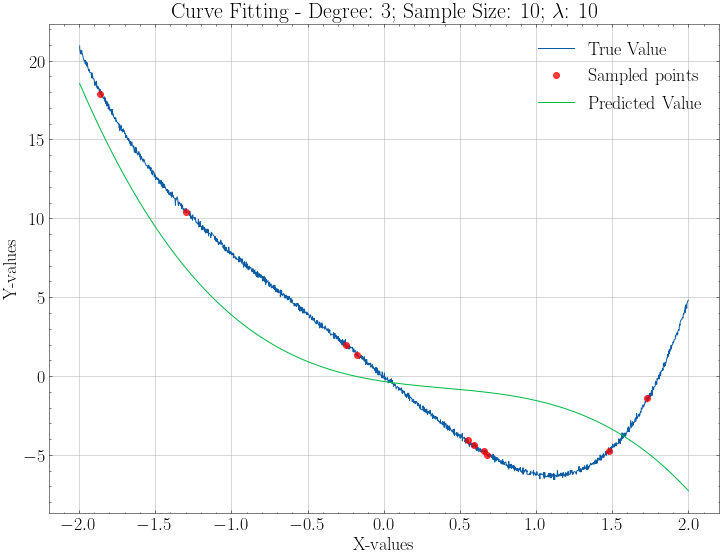

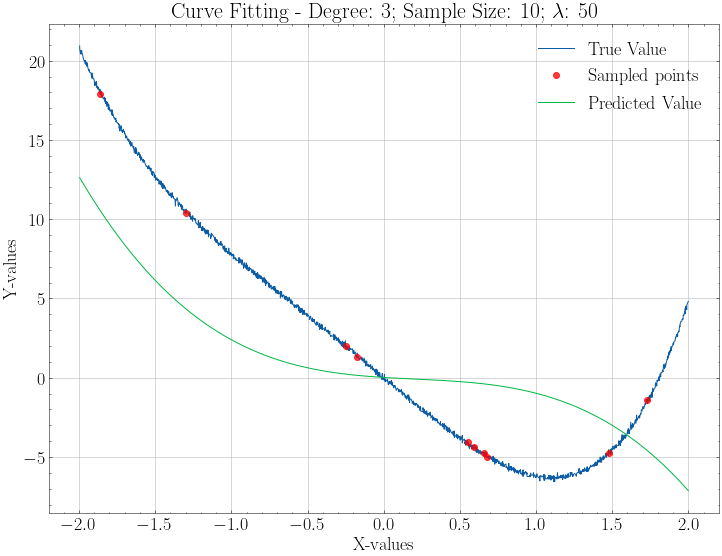

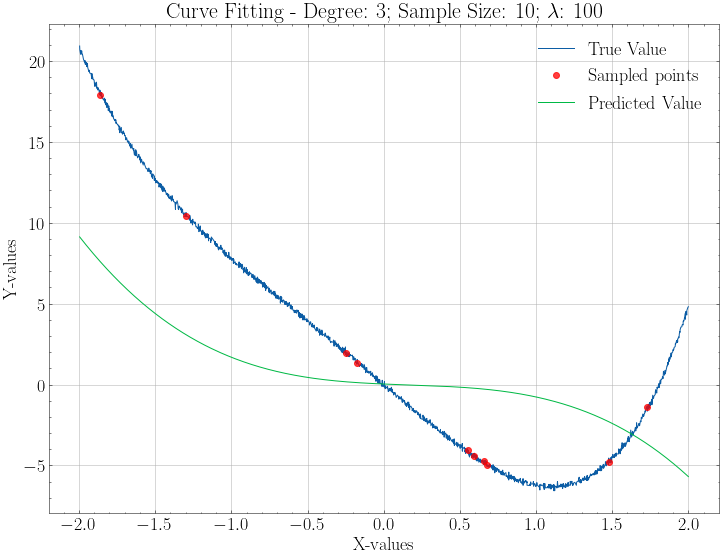

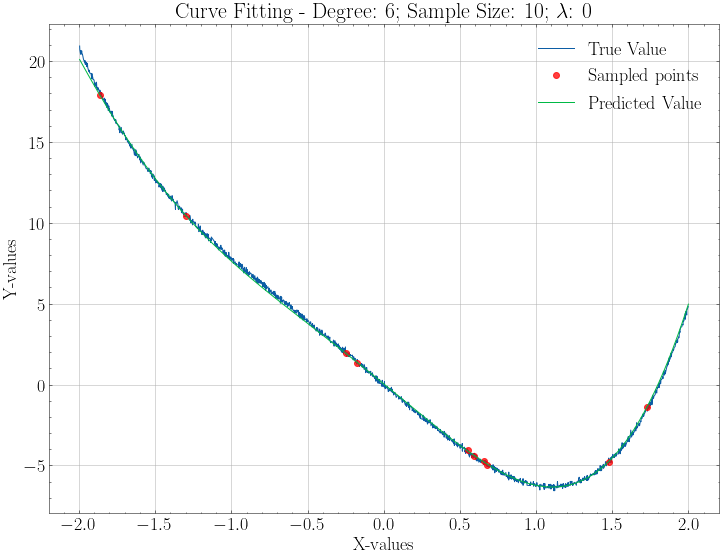

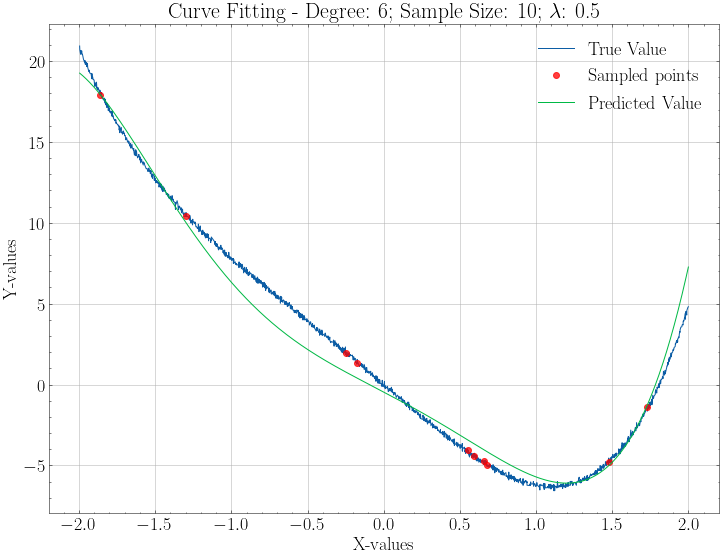

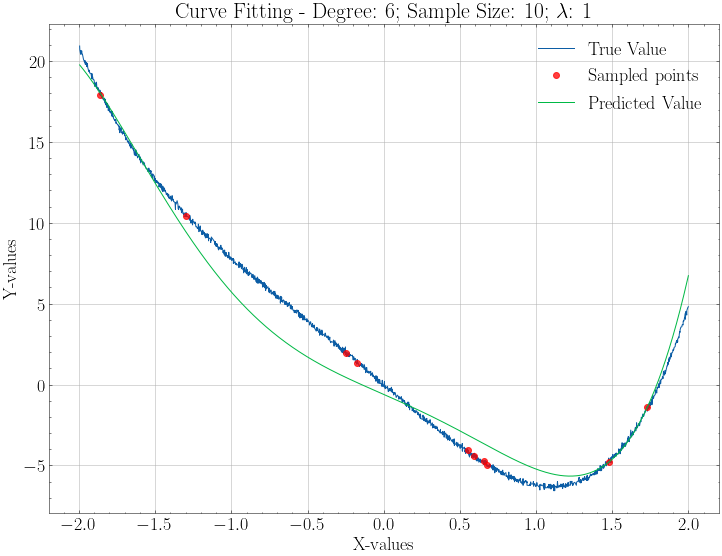

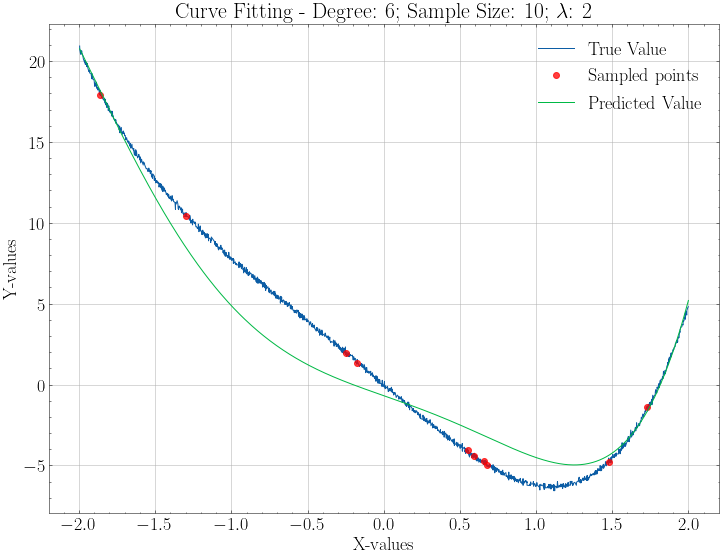

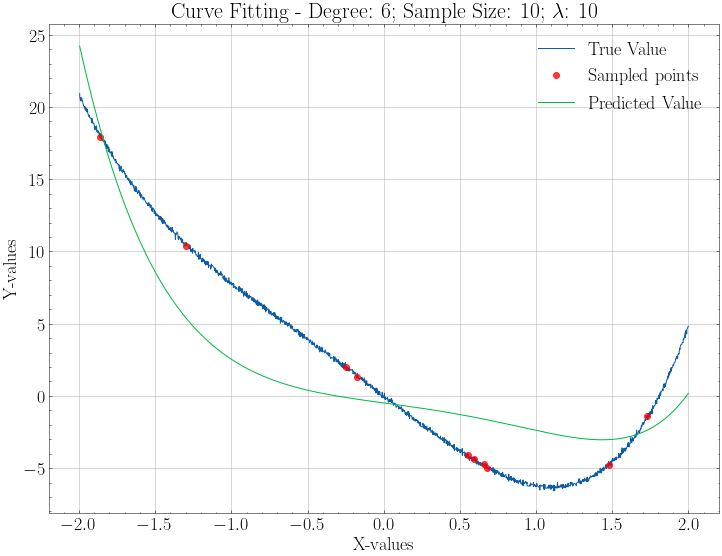

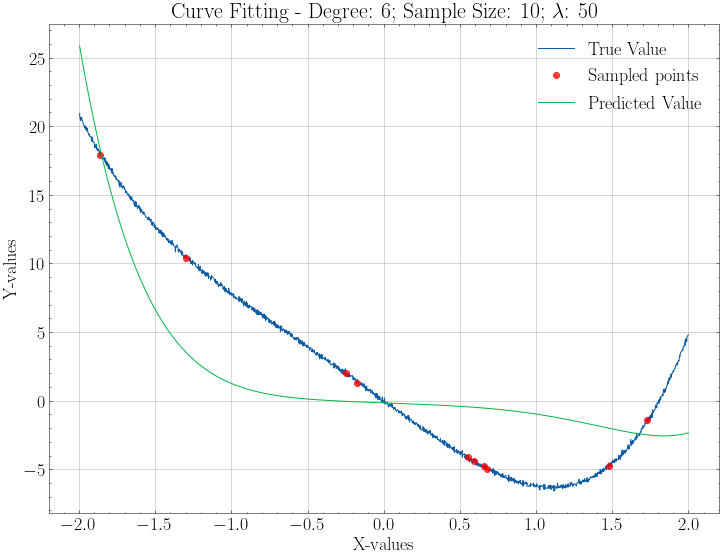

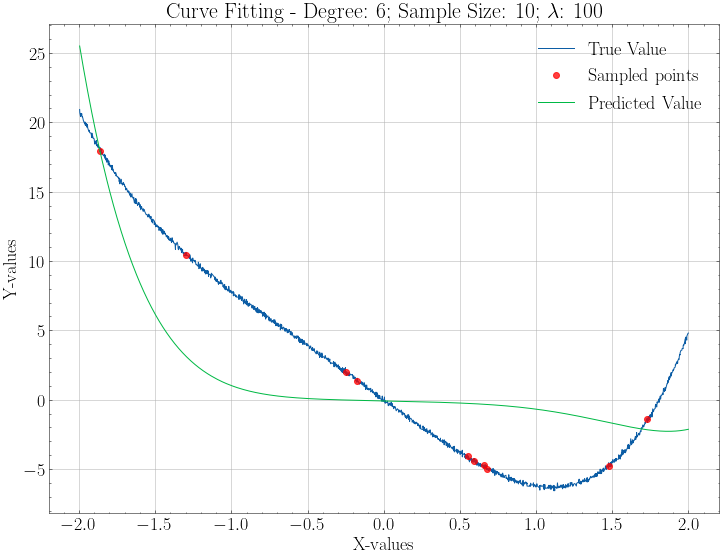

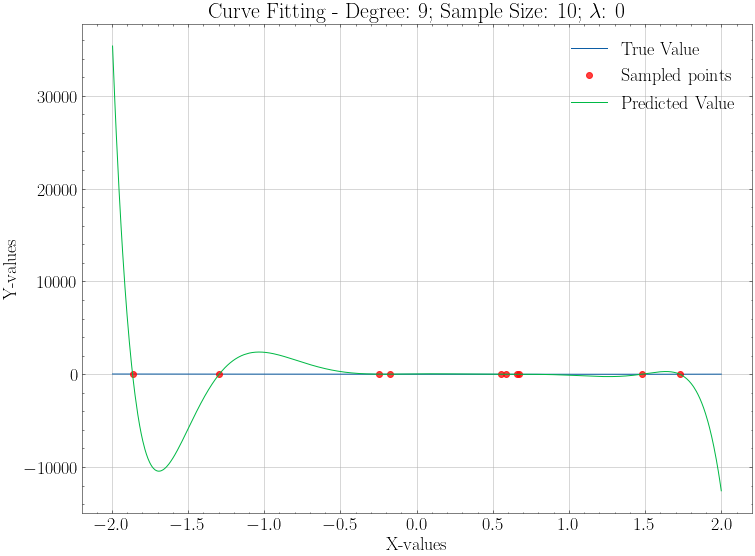

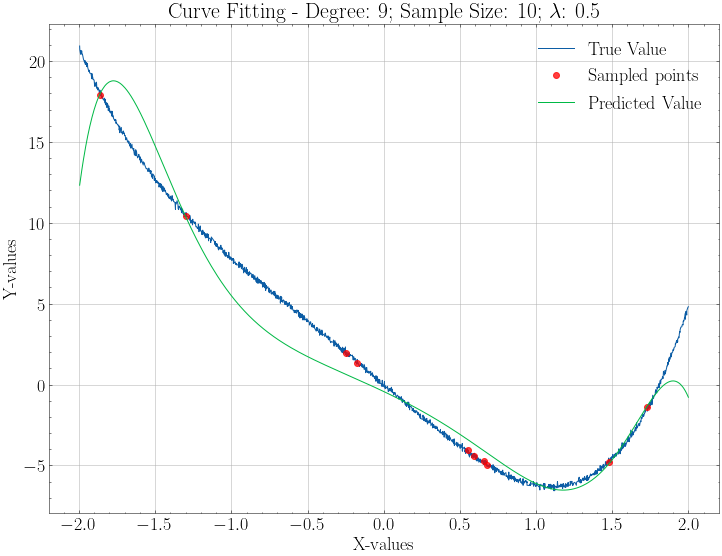

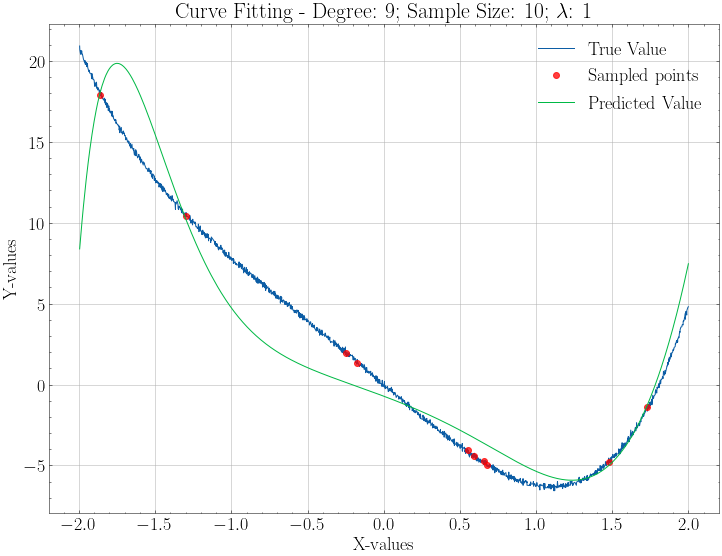

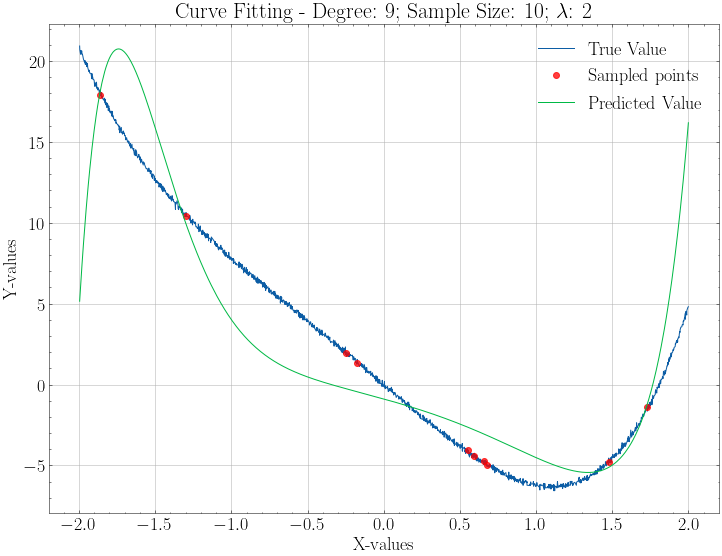

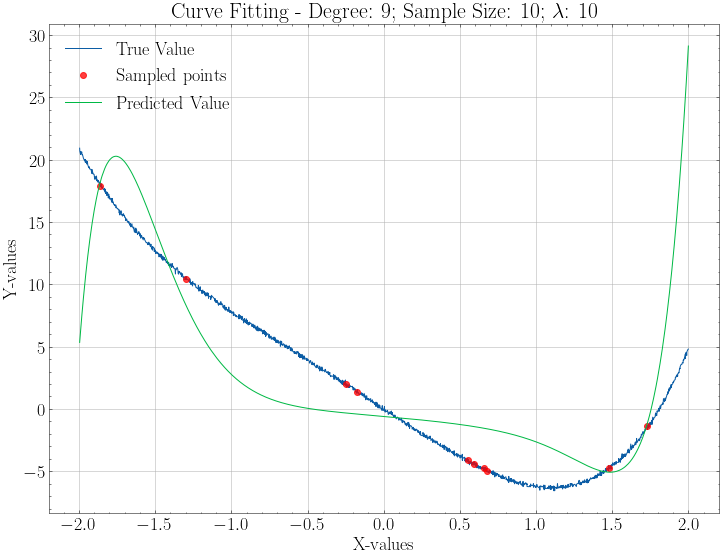

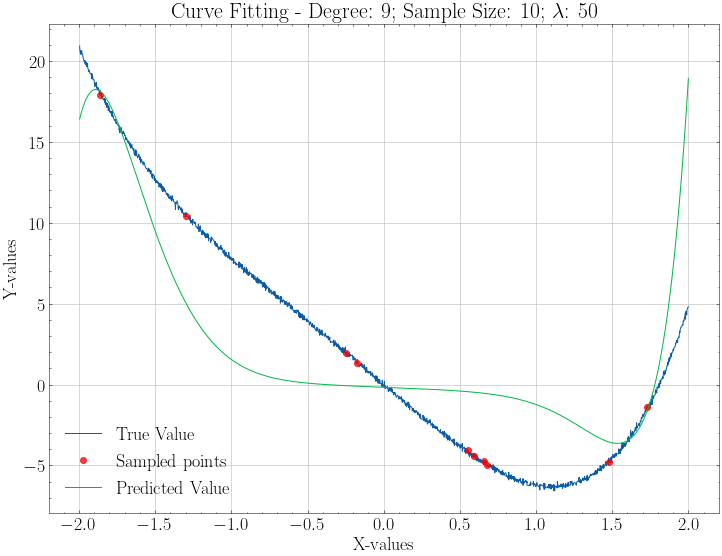

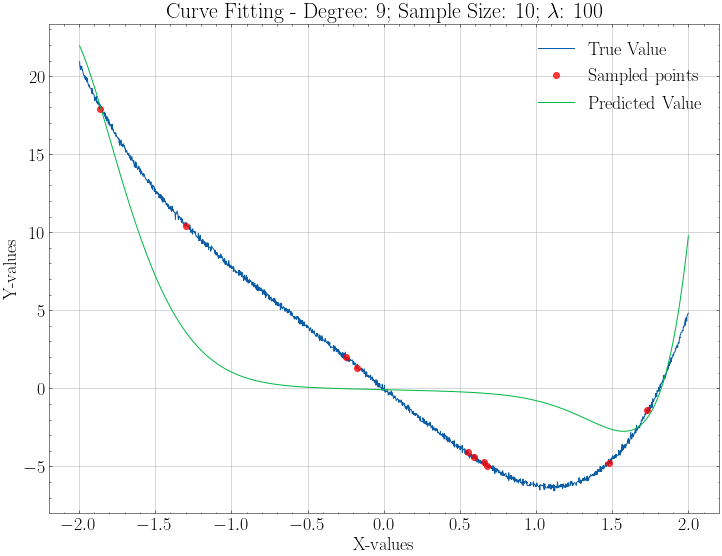

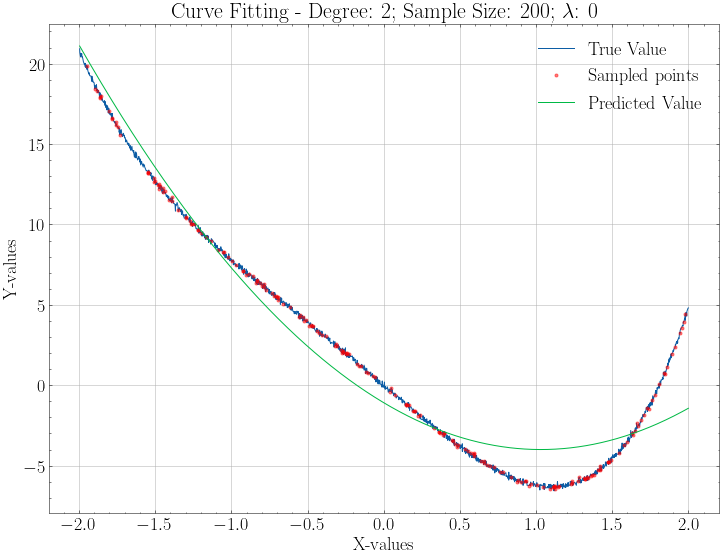

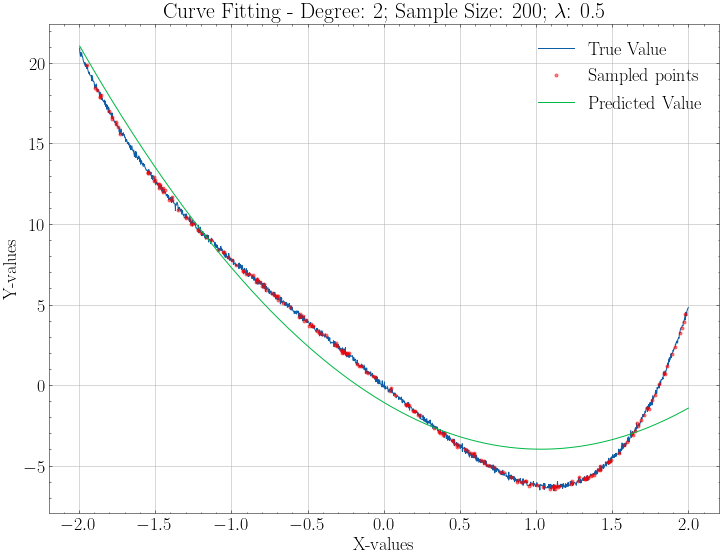

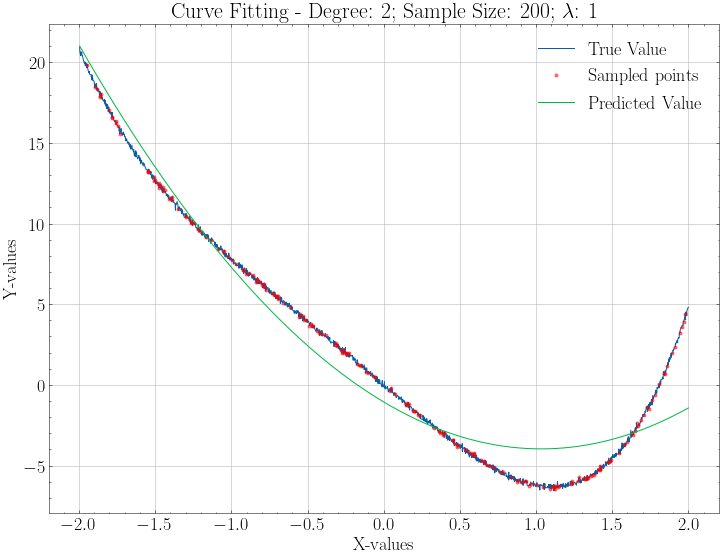

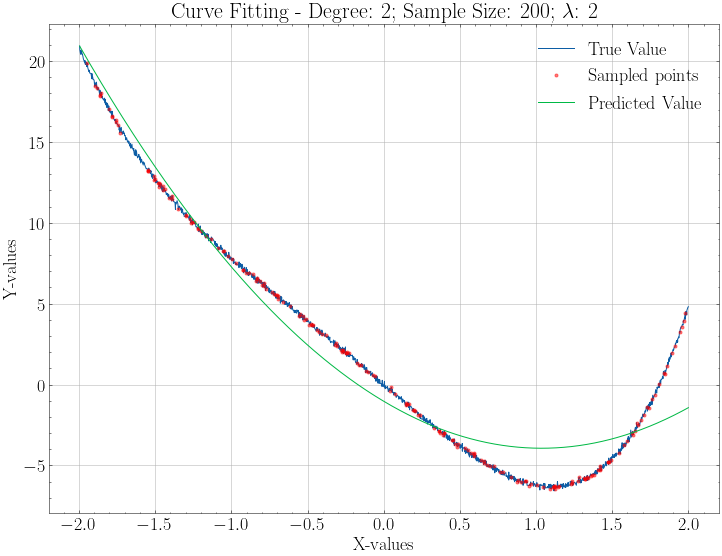

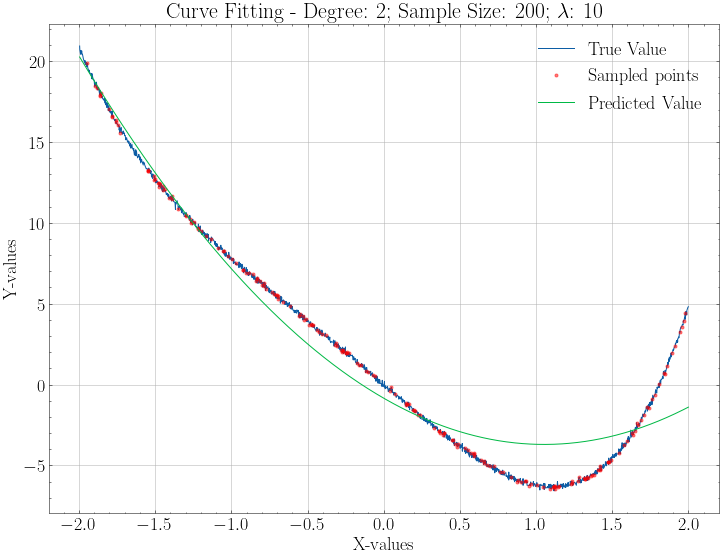

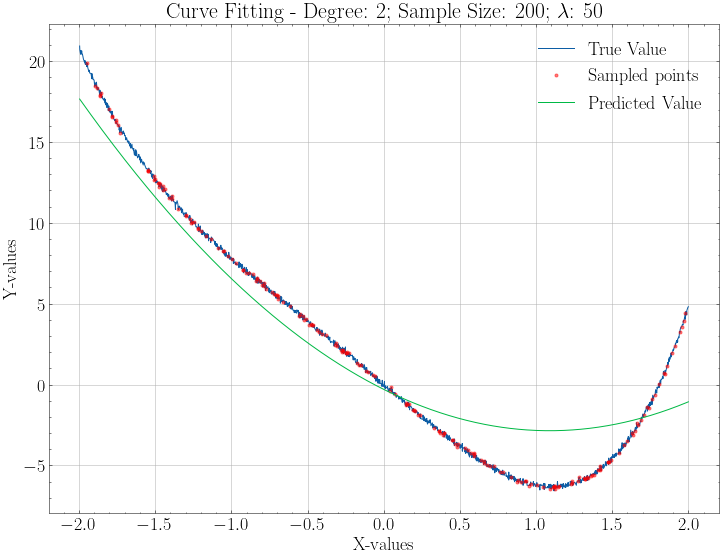

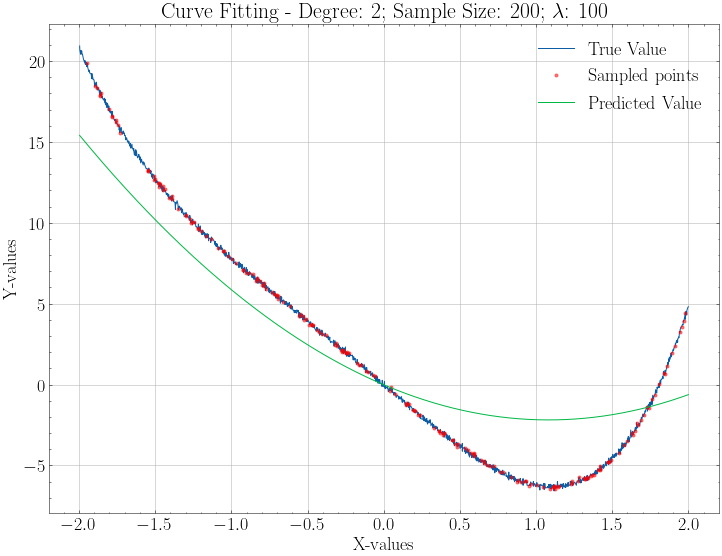

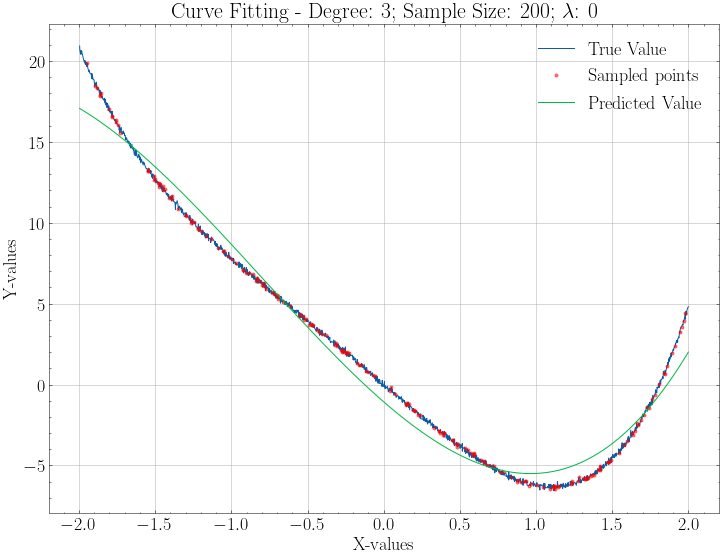

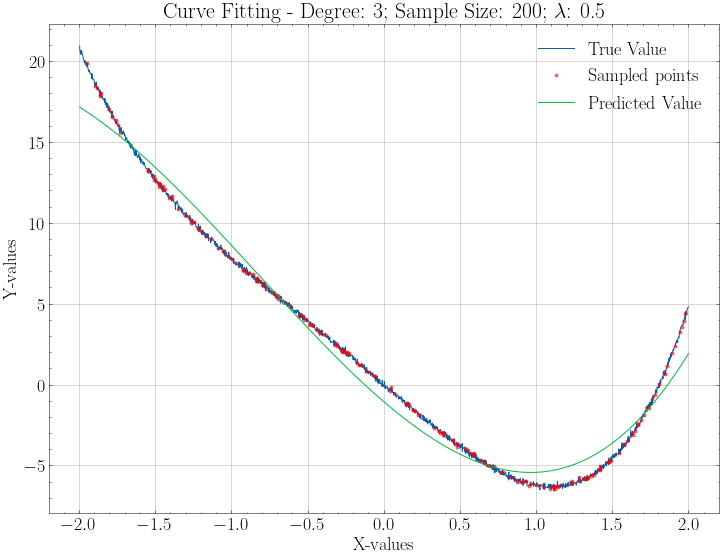

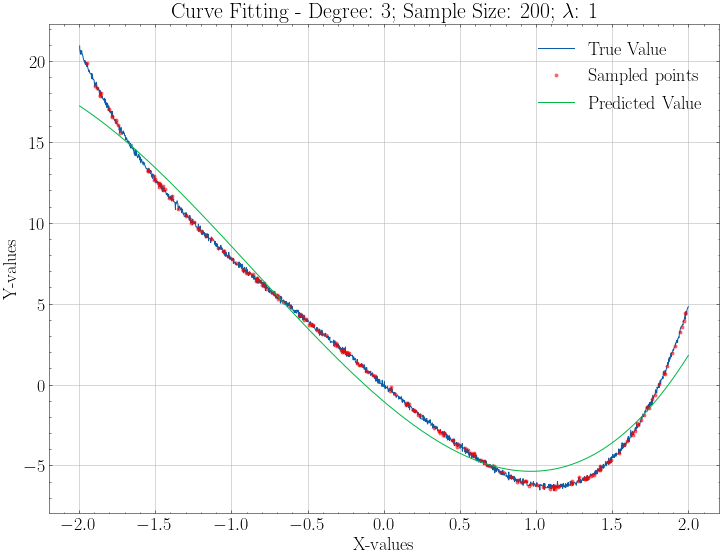

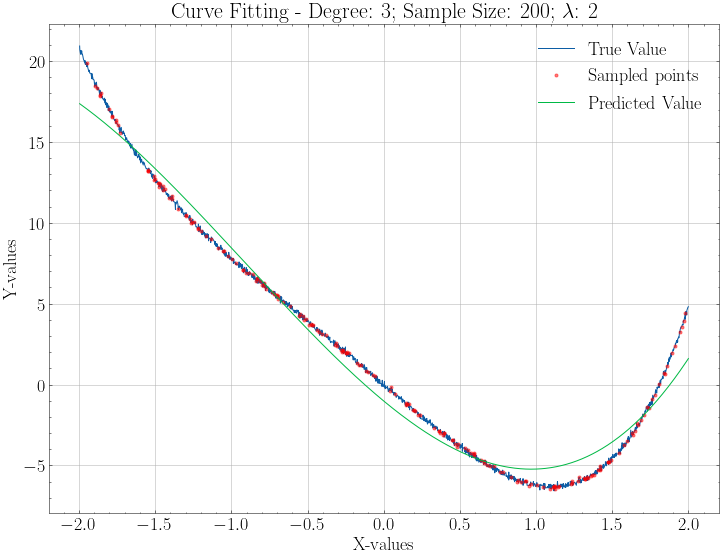

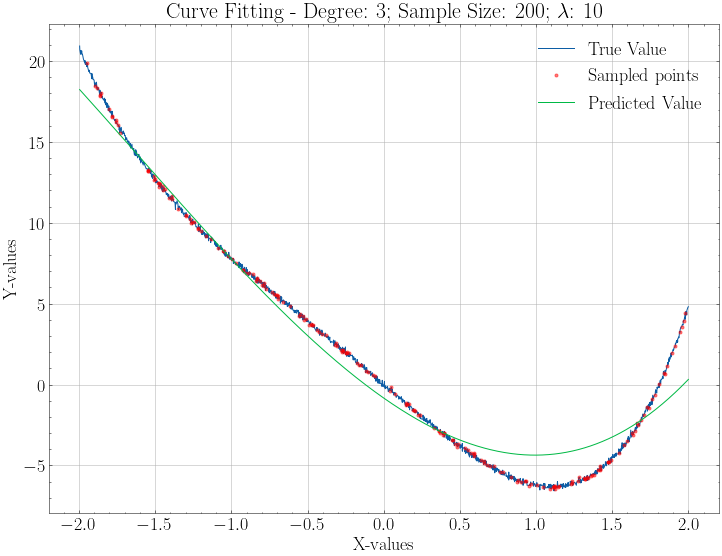

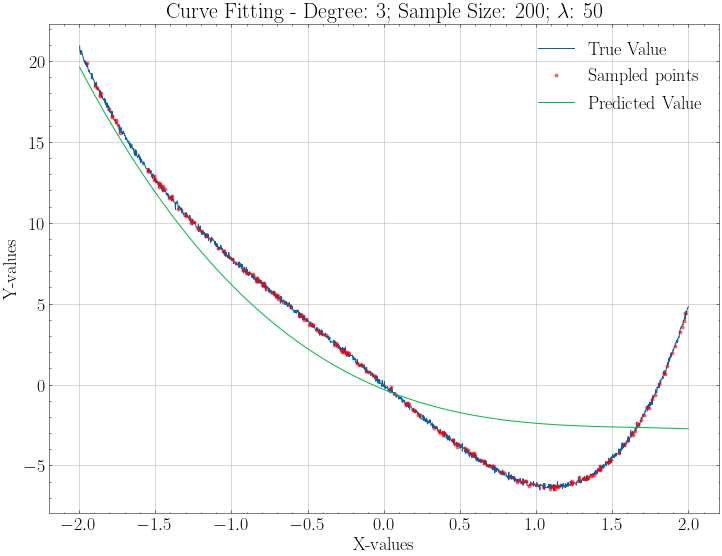

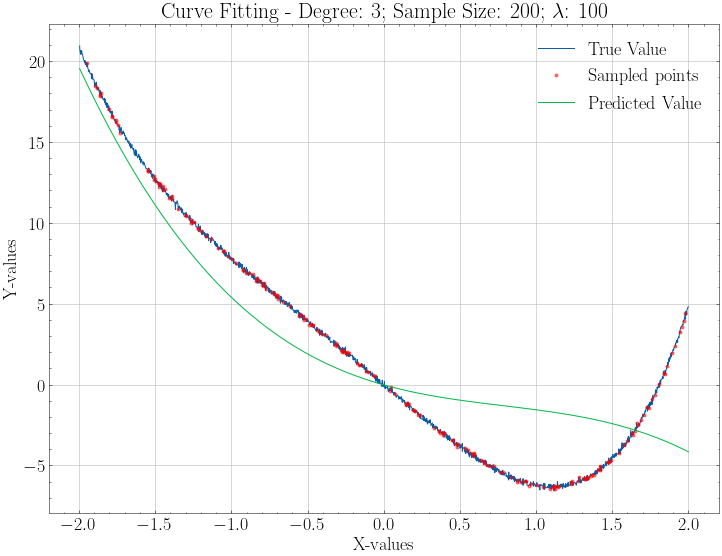

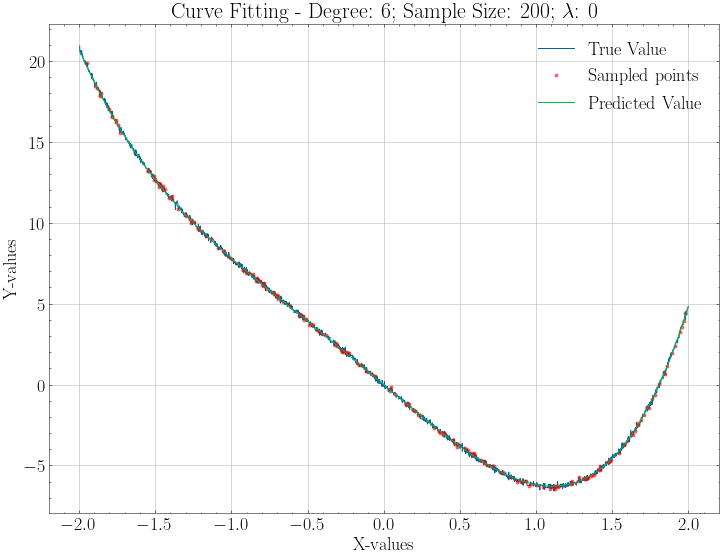

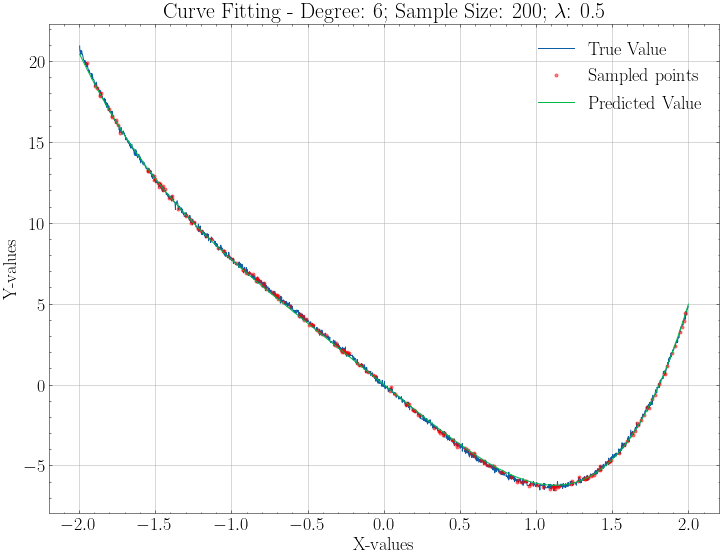

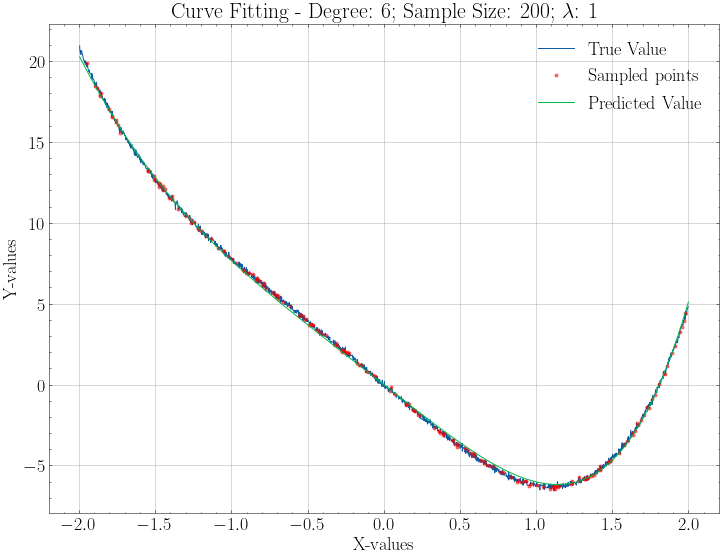

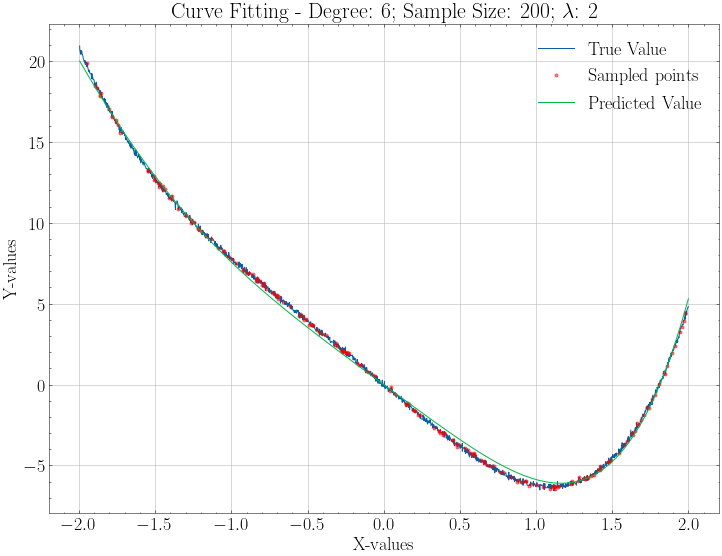

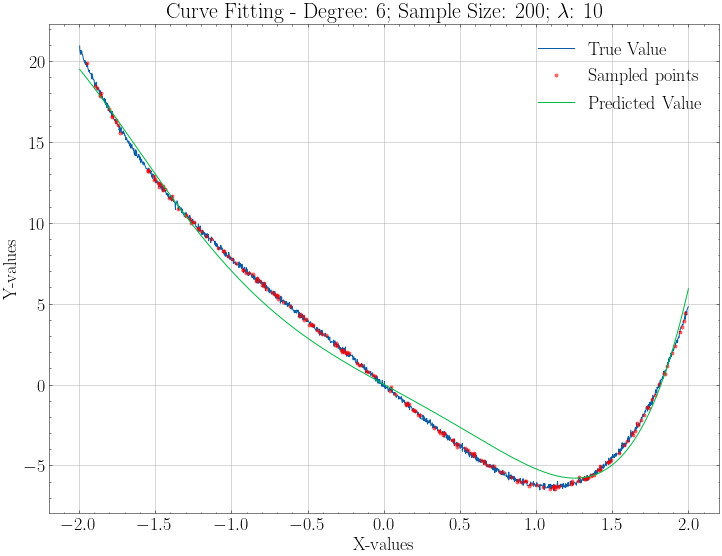

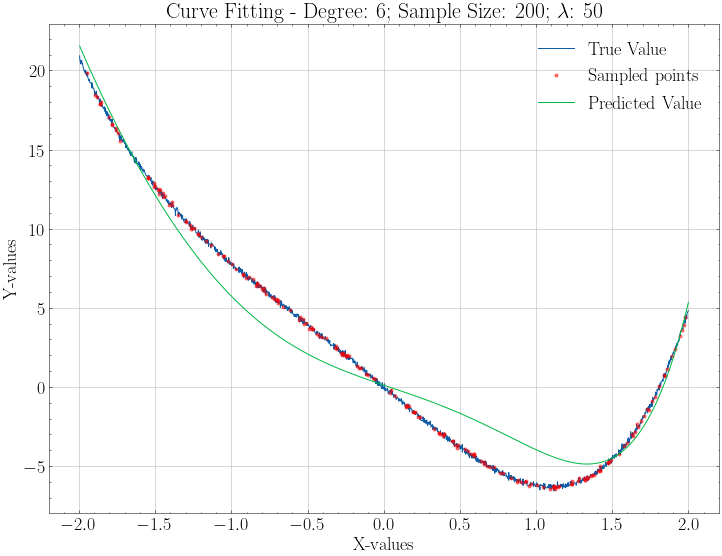

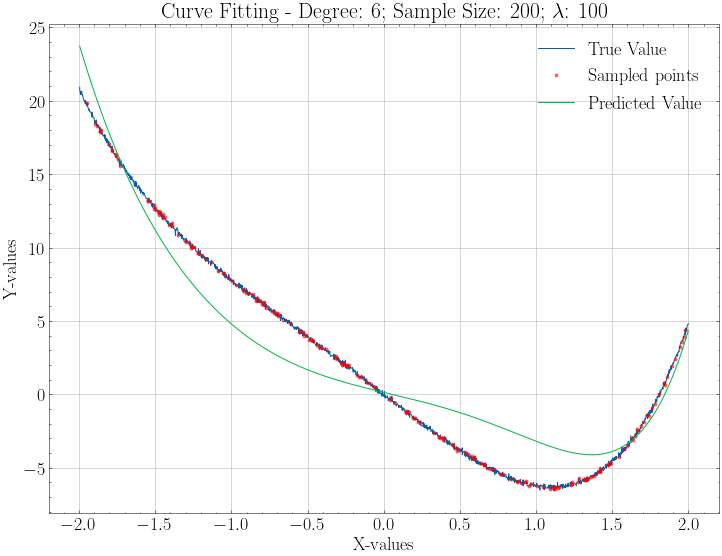

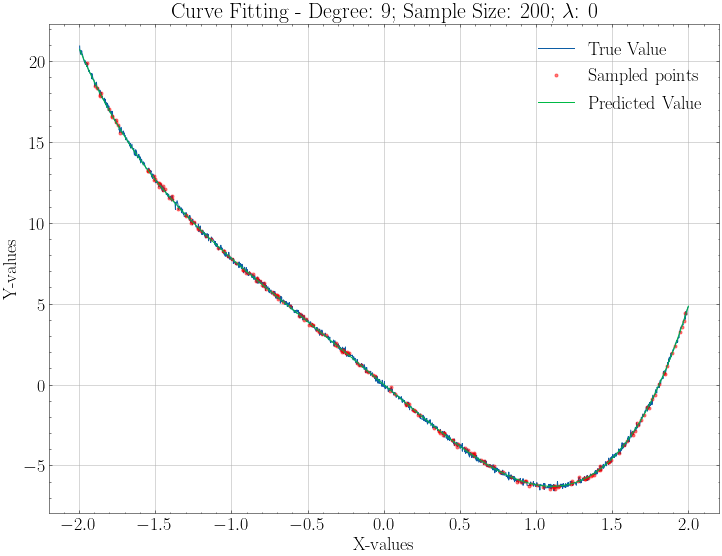

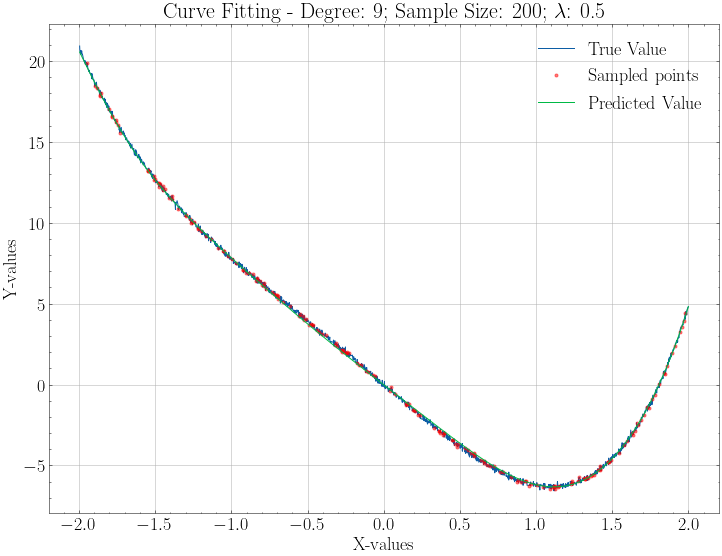

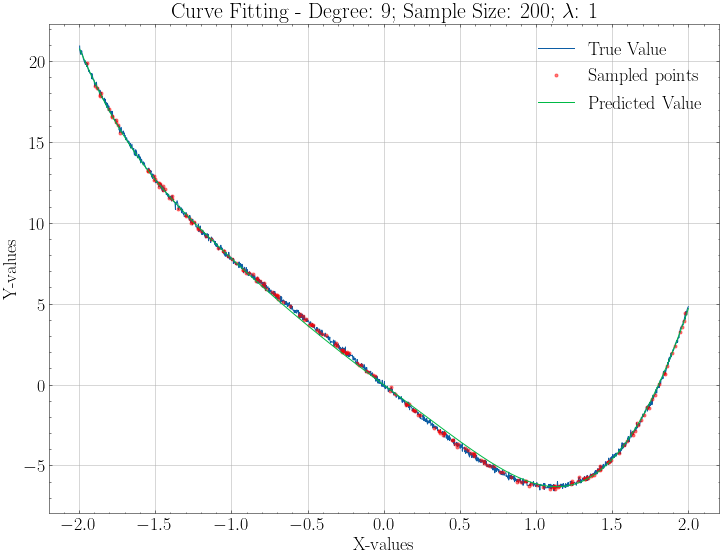

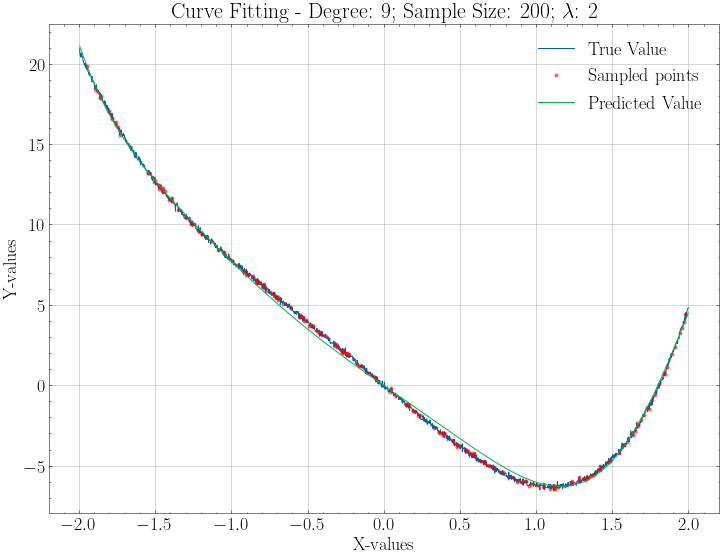

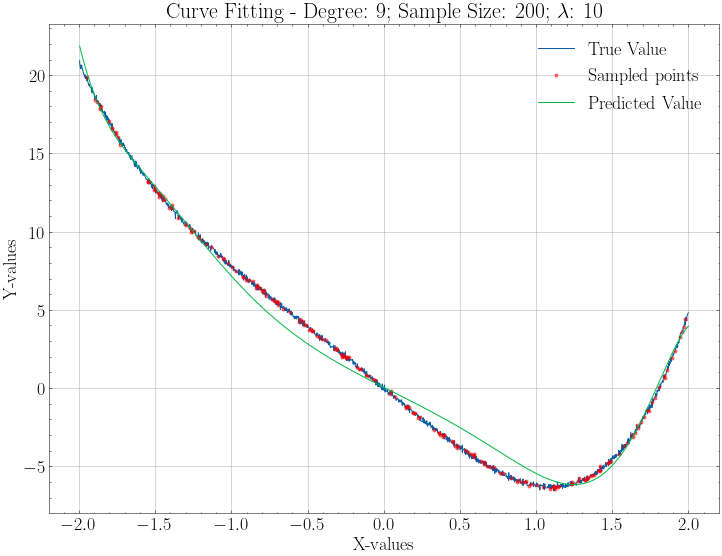

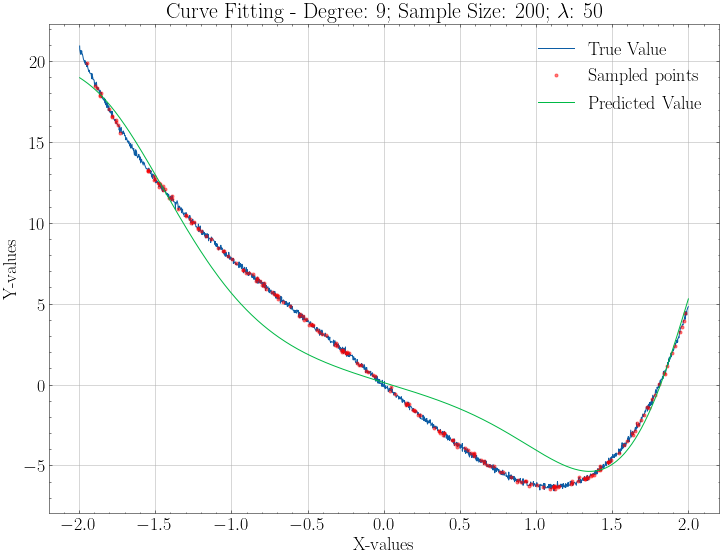

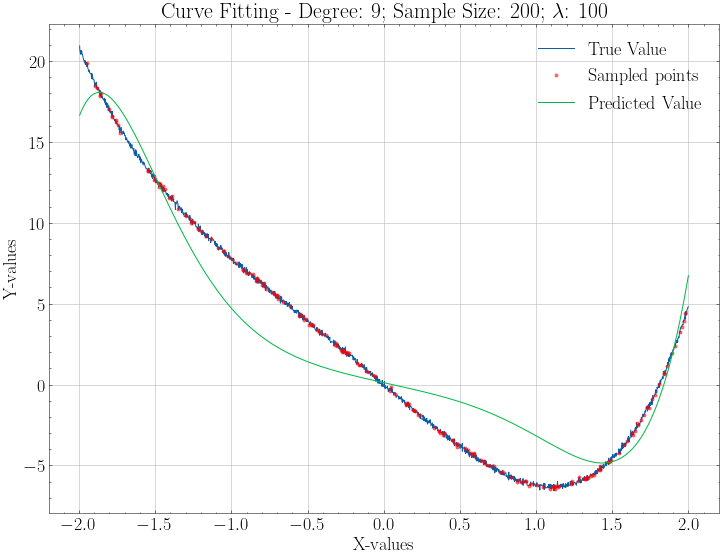

In [7]:
lmbda_list = [0, 0.5, 1, 2, 10, 50, 100]
degrees_allowed = [2, 3, 6, 9]
datasizes_considered = [10, 200]
complete_dataset_size = df.shape[0]

X = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)

for sample_size in datasizes_considered:
    df_sample = df.sample(n=sample_size, random_state=42)
    X_sampled = df_sample["x"].to_numpy().reshape(-1,1)
    y_sampled = df_sample["y"].to_numpy().reshape(-1,1)
    for degree in degrees_allowed:
        X_new_sampled = get_polynomial_features(X_sampled, degree)
        X_transformed = get_polynomial_features(X, degree)
        
        for lmbda in lmbda_list:
            W = get_weights(X_new_sampled, y_sampled, lmbda=lmbda)

            y_pred = get_predictions(W, X_transformed)
            title = "Curve Fitting - Degree: "+str(degree)+"; Sample Size: "+str(sample_size)+"; $\lambda$: "+str(lmbda)
            if lmbda == 0.5:
                lmbda = "0_5"
            fname = "d_"+str(degree)+"_size_"+str(sample_size)+"_l_"+str(lmbda)
            get_plot(X, y, y_pred, X_sampled, y_sampled, title, fname)